<a href="https://colab.research.google.com/github/UmaNagirireddi/ML_Assignment6/blob/main/Assignment6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [125]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [126]:
df = pd.read_csv('/content/Housing.csv')

# Display the last 5 rows of the DataFrame
df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [127]:
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True).replace({'yes': 1, 'no': 0})
binary_columns = df.select_dtypes(include=['object']).columns
df.shape

(545, 14)

In [128]:
scaler_x, scaler_y = MinMaxScaler(), MinMaxScaler()
X, y = scaler_x.fit_transform(df.drop('price', axis=1)), scaler_y.fit_transform(df[['price']])
X_train, X_val, y_train, y_val = train_test_split(torch.tensor(X), torch.tensor(y), test_size=0.2, random_state=42)
train_loader, val_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=32, shuffle=True), DataLoader(TensorDataset(X_val, y_val), batch_size=32)


In [129]:
def model_train(model, criterion, optimizer, epochs, train_loader, X_val, y_val):
    loss_train, loss_val = [], []

    for epoch in range(epochs + 1):
        model.train()
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()

        model.eval()
        with torch.no_grad():
            val_outputs = model(X_val)
            val_loss = criterion(val_outputs, y_val)

        if epoch % 500 == 0:
            print(f'Epoch {epoch}/{epochs}, Training Loss: {loss.item()}, Validation Loss: {val_loss.item()}')

        loss_val.append(val_loss)
        loss_train.append(loss)

    return loss_train, loss_val


**1.A**

In [130]:
model1 = nn.Sequential(nn.Linear(X_train.shape[1], 32), nn.Tanh(), nn.Linear(32, 1)).to(torch.float64)
optimizer1 = optim.SGD(model1.parameters(), lr=0.0001)
train_loss, val_loss = model_train(model1, nn.MSELoss(), optimizer1, 5000, train_loader, X_val, y_val)


Epoch 0/5000, Training Loss: 0.061502611085220114, Validation Loss: 0.10526358114807095
Epoch 500/5000, Training Loss: 0.022113395118201633, Validation Loss: 0.037806284675897875
Epoch 1000/5000, Training Loss: 0.019041312566720307, Validation Loss: 0.03230105324107771
Epoch 1500/5000, Training Loss: 0.009523184901625351, Validation Loss: 0.0288094776145249
Epoch 2000/5000, Training Loss: 0.019749995322941676, Validation Loss: 0.02640192016030886
Epoch 2500/5000, Training Loss: 0.009983795106194692, Validation Loss: 0.02462311945004498
Epoch 3000/5000, Training Loss: 0.026194933487499412, Validation Loss: 0.023264357780549427
Epoch 3500/5000, Training Loss: 0.005987881554238092, Validation Loss: 0.0221780471770931
Epoch 4000/5000, Training Loss: 0.007258699831209902, Validation Loss: 0.02127526721302088
Epoch 4500/5000, Training Loss: 0.021059998955041594, Validation Loss: 0.020514270725298208
Epoch 5000/5000, Training Loss: 0.007852689058767005, Validation Loss: 0.019876566524675055


In [131]:
for name, param in model1.named_parameters():
    print(f"Parameter name: {name}, Shape: {param.shape}")

Parameter name: 0.weight, Shape: torch.Size([32, 13])
Parameter name: 0.bias, Shape: torch.Size([32])
Parameter name: 2.weight, Shape: torch.Size([1, 32])
Parameter name: 2.bias, Shape: torch.Size([1])


In [132]:
epochs = range(0, 5001, 1)
epochs
len(epochs)

5001

In [133]:
vEpochs = range(0, 5001, 500)
vEpochs

range(0, 5001, 500)

<ipython-input-134-9dabcb4442c2>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


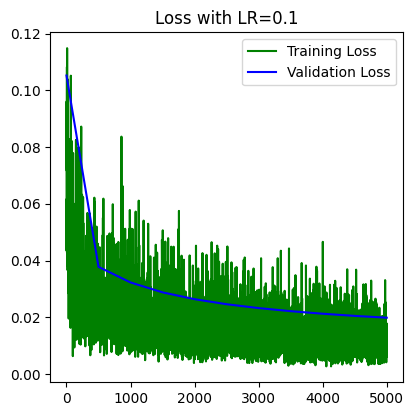

In [134]:
plt.figure(figsize=(10, 10))
plt.title('Training and Validation Loss Over Epochs')

plt.subplot(2, 2, 1)
plt.plot(list(epochs), np.array([item.detach().item() for item in train_loss]), 'g-', label='Training Loss')
plt.plot(list(vEpochs), np.array([item.detach().item() for item in val_loss[::500]]), 'b-', label='Validation Loss')
plt.title('Loss with LR=0.1')
plt.legend()

plt.show()


**1.B**

In [135]:
model2 = nn.Sequential(
    nn.Linear(X_train.shape[1], 32),
    nn.Tanh(),
    nn.Linear(32, 64),
    nn.Tanh(),
    nn.Linear(64, 16),
    nn.Tanh(),
    nn.Linear(16, 1)
).to(torch.float64)

optimizer2 = optim.SGD(model2.parameters(), lr=0.01)
train_loss_2, val_loss_2 = model_train(model2, nn.MSELoss(), optimizer2, 5000, train_loader, X_val, y_val)


Epoch 0/5000, Training Loss: 0.044331874628001575, Validation Loss: 0.07109009650486516
Epoch 500/5000, Training Loss: 0.007163943428108362, Validation Loss: 0.01362076459635361
Epoch 1000/5000, Training Loss: 0.0057024729334172785, Validation Loss: 0.013496608574893177
Epoch 1500/5000, Training Loss: 0.005210521239965534, Validation Loss: 0.013480552863040797
Epoch 2000/5000, Training Loss: 0.004528001711531778, Validation Loss: 0.013390544563176263
Epoch 2500/5000, Training Loss: 0.013859546922848484, Validation Loss: 0.013301401308779683
Epoch 3000/5000, Training Loss: 0.0043296904634351025, Validation Loss: 0.013428699957446687
Epoch 3500/5000, Training Loss: 0.0053616388853938626, Validation Loss: 0.013356297779989151
Epoch 4000/5000, Training Loss: 0.0030238045661737647, Validation Loss: 0.013269110566041312
Epoch 4500/5000, Training Loss: 0.005010991142346865, Validation Loss: 0.013305739320553022
Epoch 5000/5000, Training Loss: 0.0068450627709657486, Validation Loss: 0.01337919

In [136]:
for name, param in model2.named_parameters():
    print(f"Parameter name: {name}, Shape: {param.shape}")

Parameter name: 0.weight, Shape: torch.Size([32, 13])
Parameter name: 0.bias, Shape: torch.Size([32])
Parameter name: 2.weight, Shape: torch.Size([64, 32])
Parameter name: 2.bias, Shape: torch.Size([64])
Parameter name: 4.weight, Shape: torch.Size([16, 64])
Parameter name: 4.bias, Shape: torch.Size([16])
Parameter name: 6.weight, Shape: torch.Size([1, 16])
Parameter name: 6.bias, Shape: torch.Size([1])


In [137]:
total_params = sum(p.numel() for p in model2.parameters() if p.requires_grad)
print("Total number of trainable parameters ", total_params,  '\n')

Total number of trainable parameters  3617 



<ipython-input-138-bb5a8bdccac9>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


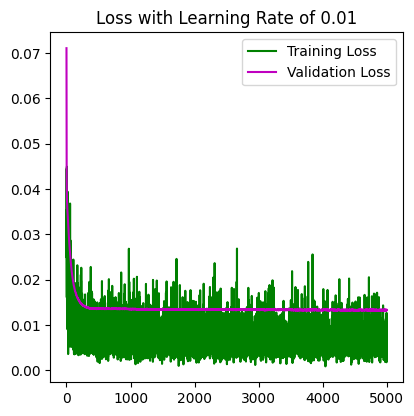

In [138]:
plt.figure(figsize=(10, 10))
plt.title('Loss for optimizer - SGD')

plt.subplot(2, 2, 1)
plt.plot(epochs, np.array([item.detach().item() for item in train_loss_2]), 'g-', label='Training Loss')  # Green color
plt.plot(epochs, np.array([item.detach().item() for item in val_loss_2]), 'm-', label='Validation Loss')  # Magenta color
plt.title('Loss with Learning Rate of 0.01')
plt.legend()

plt.show()


# **Part 2**

In [139]:
!pip install ipython-autotime
%load_ext autotime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 7.3 MB/s eta 0:00:00
time: 352 µs (started: 2023-12-01 23:15:50 +00:00)


In [140]:

import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torchvision import datasets, transforms
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

time: 950 ms (started: 2023-12-01 23:16:15 +00:00)


In [141]:
torch.manual_seed(123)

time: 15.7 ms (started: 2023-12-01 23:16:32 +00:00)


In [142]:
train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())

# Calculate mean and std
imgs = torch.stack([img_t for img_t, _ in train_dataset], dim=3)
mean, std = imgs.view(3, -1).mean(dim=1), imgs.view(3, -1).std(dim=1)


100%|██████████| 170498071/170498071 [00:01<00:00, 106051294.53it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
time: 19.9 s (started: 2023-12-01 23:17:25 +00:00)


In [143]:
mean

tensor([0.4914, 0.4822, 0.4465])

time: 15.8 ms (started: 2023-12-01 23:17:58 +00:00)


In [144]:
std

tensor([0.2470, 0.2435, 0.2616])

time: 14.3 ms (started: 2023-12-01 23:19:36 +00:00)


In [145]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

time: 662 µs (started: 2023-12-01 23:19:41 +00:00)


In [146]:
device

device(type='cpu')

time: 6.15 ms (started: 2023-12-01 23:19:57 +00:00)


In [147]:
# Define mean and std
mean = (0.4915, 0.4823, 0.4468)
std = (0.2470, 0.2435, 0.2616)

# Define transformation with calculated mean and std
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

# Create CIFAR-10 datasets
cifar10 = datasets.CIFAR10('./data', train=True, download=False, transform=transform)
cifar10_val = datasets.CIFAR10('./data', train=False, download=False, transform=transform)


time: 1.54 s (started: 2023-12-01 23:23:36 +00:00)


In [148]:
first_image, label = cifar10[0]
print(first_image.shape)

torch.Size([3, 32, 32])
time: 6.96 ms (started: 2023-12-01 23:23:57 +00:00)


In [149]:
train_loader = DataLoader(cifar10, batch_size=32, shuffle=True, num_workers=2)
test_loader = DataLoader(cifar10_val, batch_size=32, shuffle=False, num_workers=2)

time: 1.06 ms (started: 2023-12-01 23:24:11 +00:00)


In [150]:
model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(32 * 32 * 3, 512),
    nn.Tanh(),
    nn.Linear(512, 10)
).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)


time: 20.8 ms (started: 2023-12-01 23:25:47 +00:00)


In [151]:
def train_model(model, train_loader, test_loader, num_epochs=300, lr=0.001):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=lr)

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        # Testing the model
        model.eval()
        correct, total = 0, 0
        all_predicted, all_labels = [], []

        with torch.no_grad():
            for inputs, labels in test_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

                all_predicted.extend(predicted.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())

        accuracy = correct / total

        if epoch % 1 == 0:
            print(f'Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader)}, Test Accuracy: {accuracy * 100:.2f}%')

    # Classification Report
    report = classification_report(all_labels, all_predicted)
    print("Classification Report:\n", report)


time: 5.01 ms (started: 2023-12-01 23:26:37 +00:00)


In [152]:
train_model(model, train_loader, test_loader, num_epochs=300, lr=0.01)

Epoch 1/300, Loss: 1.7886348081870638, Test Accuracy: 40.94%
Epoch 2/300, Loss: 1.6521172705020037, Test Accuracy: 43.15%
Epoch 3/300, Loss: 1.5804378465437692, Test Accuracy: 44.45%
Epoch 4/300, Loss: 1.5198366514246813, Test Accuracy: 45.26%
Epoch 5/300, Loss: 1.4625313013544161, Test Accuracy: 46.44%
Epoch 6/300, Loss: 1.4085316710646, Test Accuracy: 47.50%
Epoch 7/300, Loss: 1.3539841107580803, Test Accuracy: 47.11%
Epoch 8/300, Loss: 1.3031534532744078, Test Accuracy: 47.23%
Epoch 9/300, Loss: 1.249340126015632, Test Accuracy: 48.36%
Epoch 10/300, Loss: 1.1990976107097633, Test Accuracy: 47.90%
Epoch 11/300, Loss: 1.147438968516891, Test Accuracy: 48.39%
Epoch 12/300, Loss: 1.0958708692496966, Test Accuracy: 49.10%
Epoch 13/300, Loss: 1.0460041413990564, Test Accuracy: 48.73%
Epoch 14/300, Loss: 0.9943198018247931, Test Accuracy: 48.12%
Epoch 15/300, Loss: 0.9466876947223873, Test Accuracy: 48.06%
Epoch 16/300, Loss: 0.8974496146195681, Test Accuracy: 48.03%
Epoch 17/300, Loss: 0.

In [153]:
model2 = nn.Sequential(
    nn.Flatten(),
    nn.Linear(32 * 32 * 3, 512),
    nn.Tanh(),
    nn.Linear(512, 256),
    nn.Tanh(),
    nn.Linear(256, 128),
    nn.Tanh(),
    nn.Linear(128, 10)
).to(device)

time: 23.9 ms (started: 2023-12-02 02:12:56 +00:00)


In [ ]:
train_model(model2, train_loader, test_loader, num_epochs=300, lr=0.01)

Epoch 1/300, Loss: 1.8525115716785325, Test Accuracy: 39.86%
Epoch 2/300, Loss: 1.6869112958682324, Test Accuracy: 41.70%
Epoch 3/300, Loss: 1.6147569851927168, Test Accuracy: 43.42%
Epoch 4/300, Loss: 1.5524838497374809, Test Accuracy: 45.18%
Epoch 5/300, Loss: 1.4961205005111866, Test Accuracy: 45.93%
Epoch 6/300, Loss: 1.4420395591132396, Test Accuracy: 46.48%
Epoch 7/300, Loss: 1.3869562117395993, Test Accuracy: 47.04%
Epoch 8/300, Loss: 1.3304111210871261, Test Accuracy: 47.79%
Epoch 9/300, Loss: 1.2721629204539557, Test Accuracy: 47.46%
Epoch 10/300, Loss: 1.2145694345903184, Test Accuracy: 48.17%
Epoch 11/300, Loss: 1.1551353657238008, Test Accuracy: 46.41%
Epoch 12/300, Loss: 1.0963393020767167, Test Accuracy: 46.19%
Epoch 13/300, Loss: 1.0335245162382083, Test Accuracy: 47.70%
Epoch 14/300, Loss: 0.9775107119301536, Test Accuracy: 48.41%
Epoch 15/300, Loss: 0.915340742657601, Test Accuracy: 47.51%
Epoch 16/300, Loss: 0.8570451142310486, Test Accuracy: 47.54%
Epoch 17/300, Loss